# <h3 align="center">__Module 8 Activity__</h3>
# <h3 align="center">__Assigned at the start of Module 8__</h3>
# <h3 align="center">__Due at the end of Module 8__</h3><br>

# Weekly Discussion Forum Participation

Each week, you are required to participate in the module’s discussion forum. The discussion forum consists of the week's Module Activity, which is released at the beginning of the module. You must complete/attempt the activity before you can post about the activity and anything that relates to the topic.

## Grading of the Discussion

### 1. Initial Post:
Create your thread by **Day 5 (Saturday night at midnight, PST).**

### 2. Responses:
Respond to at least two other posts by **Day 7 (Monday night at midnight, PST).**

---

## Grading Criteria:

Your participation will be graded as follows:

### Full Credit (100 points):
- Submit your initial post by **Day 5.**
- Respond to at least two other posts by **Day 7.**

### Half Credit (50 points):
- If your initial post is late but you respond to two other posts.
- If your initial post is on time but you fail to respond to at least two other posts.

### No Credit (0 points):
- If both your initial post and responses are late.
- If you fail to submit an initial post and do not respond to any others.

---

## Additional Notes:

- **Late Initial Posts:** Late posts will automatically receive half credit if two responses are completed on time.
- **Substance Matters:** Responses must be thoughtful and constructive. Comments like “Great post!” or “I agree!” without further explanation will not earn credit.
- **Balance Participation:** Aim to engage with threads that have fewer or no responses to ensure a balanced discussion.

---

## Avoid:
- A number of posts within a very short time-frame, especially immediately prior to the posting deadline.
- Posts that complement another post, and then consist of a summary of that.


In [179]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Problem 1: Support Vector Machines (SVM) - Understanding Margins & Decision Boundaries

A company is classifying emails as spam or not spam using an SVM classifier. The dataset consists of word frequency features extracted from emails. Your task is to visualize the decision boundary, experiment with the kernel type, and analyze how support vectors influence classification.

## Dataset
We will generate a synthetic dataset with two classes (spam and not spam) for visualization purposes.

```python
# Generate synthetic dataset (2 features for visualization)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an SVM classifier
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)
```

### SVM with linear kernel

Following is updated code to plot SVM margin and decision boundary

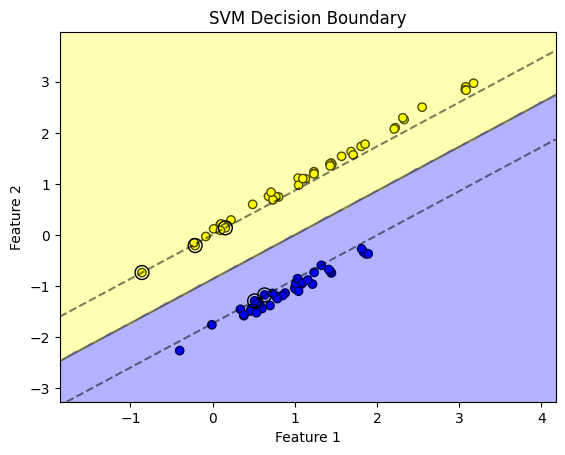

In [180]:
from matplotlib.colors import ListedColormap

# Function to plot decision boundary
def plot_decision_boundary(model, X, y):
    # Get the hyperplane parameters
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.decision_function(xy).reshape(xx.shape)

    # Plot the data points, coloring them by their class label
    custom_cmap = ListedColormap(['blue', 'yellow']) # Colors for class 0 and class 1
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=custom_cmap, edgecolors='k')

    # Plot the background regions
    plt.contourf(xx, yy, Z > 0, cmap=custom_cmap, alpha=0.3)

    # Plot the decision boundary and margins
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    # Highlight the support vectors (the points on the edge of the street)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
              linewidth=1, facecolors='none', edgecolors='k')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Generate synthetic dataset (2 features for visualization)
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define an SVM classifier
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

## Q1. Modify the kernel type in the SVM classifier `(SVC(kernel='linear'))` to `rbf` and `poly`. How does the decision boundary change?


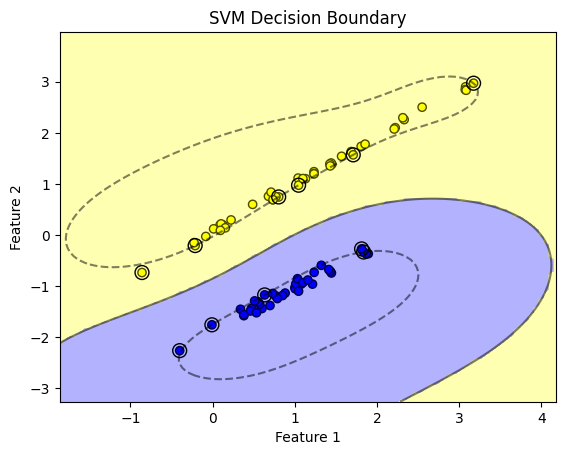

In [181]:
# Define an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

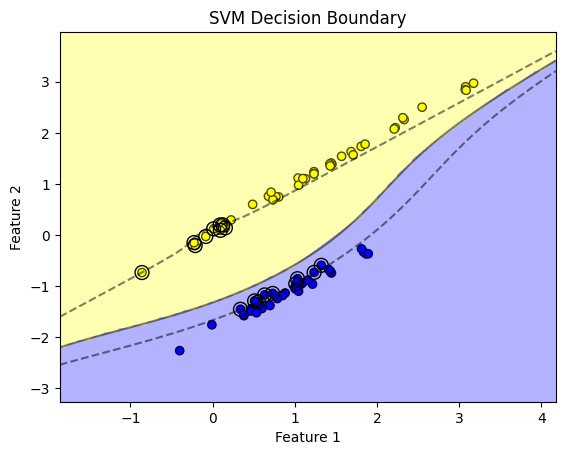

In [182]:
# Define an SVM classifier
svm_model = SVC(kernel='poly', degree=3, C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

**Observations on the kernel types**

- The **linear kernel** can only find the best straight line to separate the data. It's like a rigid ruler. If the data isn't separable by a straight line, it will do its best but will ultimately fail to capture the underlying pattern.
- The **rbf (Radial Basis Function) kernel** is far more flexible. It doesn't draw a straight line. Instead, it works by measuring the "similarity" or "influence" between points based on their distance.
- like RBF, the **poly kernel** creates a curved decision boundary. However, the nature of the curve is different.
  - degree=1 would be a linear equation (a straight line) $ax_1+bx_2+c=0$
  - degree=2 would be a quadratic equation (a parabola, ellipse, or hyperbola): $a{x_1}^2+b{x_2}^2+cx_1x_2+..=0$
  - degree=3 (which we used) is a cubic equation, allowing for S-shaped curves and more complex shapes.

## Q2. Identify the support vectors in the model. What role do they play in defining the decision boundary?
 - Support vectors are the data points that are right on the edge of the margin line.
 - They gives maximize margin.
 - They are the most critical points in the dataset because they are the ones that “support” the hyperplane.
 - If we need to move any other point, the decision boundary wouldn’t change.
 - But if we move a support vector, the decision boundary will have to move too.

## Q3. Adjust the `C` parameter (try `C=0.1` vs. `C=10`). What effect does this have on the margin width and classification?

**C:** This is a hyperparameter called the cost or regularization parameter. It controls the trade-off:

- **High C:** A high cost for slack. The model will try very hard to classify every point correctly, resulting in a narrow margin. Can lead to overfitting.
- **Low C:** A low cost for slack. The model will prioritize a wider margin, even if it means misclassifying a few points. More robust to outliers.

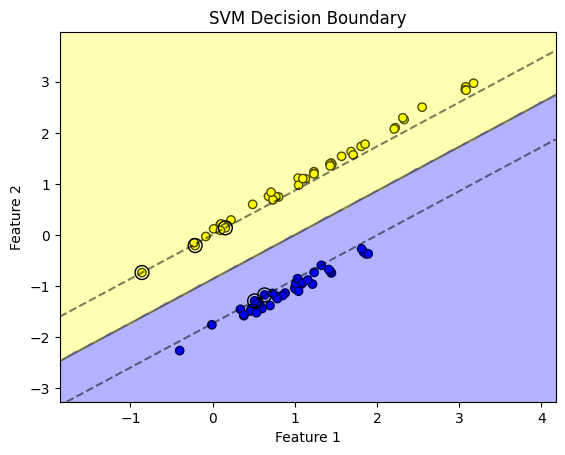

In [183]:
# Define an SVM classifier
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

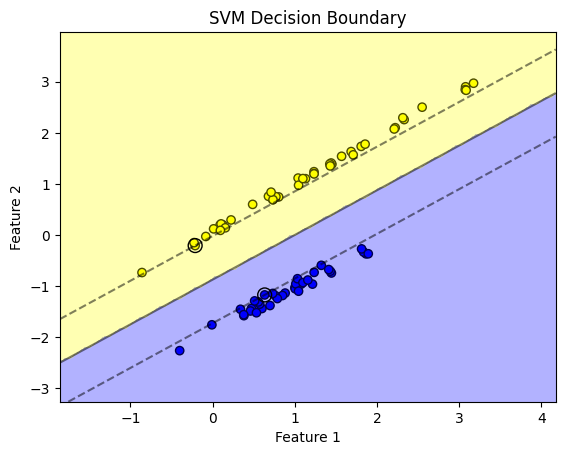

In [184]:
# Define an SVM classifier
svm_model = SVC(kernel='linear', C=10.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)


## Q4. If you have overlapping classes, which kernel type would likely perform best? Why?

When we have overlapping classes, the best-performing kernel will almost always be the **Radial Basis Function (RBF) kernel**. Following are reasons for why.

- The RBF kernel creates a decision boundary where the combined "pull" from one class's force fields perfectly balances the pull from the other class's.
- For overlapping data, this means the boundary can be a smooth, complex curve that finds the most sensible path through the "fuzzy," mixed region, without being overly influenced by points far away. It effectively isolates the dense parts of each cluster.

Note: The RBF kernel doesn't work alone. It needs help from the C (regularization) parameter, which controls the soft margin.
- **C** is the penalty for misclassification. It determines how much you tolerate points being on the wrong side of the margin.
- **Low C:** A low penalty. The SVM is allowed to misclassify more points in exchange for a wider, smoother margin. This is ideal for highly overlapping data, as it avoids overfitting to the noise.
- **High C:** A high penalty. The SVM will try to classify every point correctly, which can lead to a very complex, "wiggly" boundary that overfits the noisy, overlapping points.



# Problem 2: Calculatin Decision Boundaries - Logistic Regression vs SVM

You are training a binary classifier to predict whether a customer will buy a product based on their income and age. The model must learn the decision boundary that separates the two groups.

```python
# Generate dataset with two features
X, y = make_classification(n_samples=200, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X, y)

# Function to plot decision boundaries
def plot_models(models, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    plt.figure(figsize=(12, 5))

    for i, (model, title) in enumerate(models):
        plt.subplot(1, 2, i + 1)
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title)

    plt.show()

# Plot decision boundaries for both models
plot_models([(log_reg, "Logistic Regression Decision Boundary"), (svm_model, "SVM Decision Boundary")], X, y)

```

## Q1. Compare the decision boundaries of Logistic Regression and SVM. How do they differ in separating the two classes?

Let's update the code with following
1. The default `make_classification` often creates data that is very easily separated. The subtle differences between Logistic Regression and SVM become much more apparent when the classes are closer together or slightly overlapping. We can control this with the `class_sep` parameter.
2. Split the data into training and testing sets and report the accuracy of each model.
3. Update SVM plot with margin and support vectors to plot the essence of an SVM.


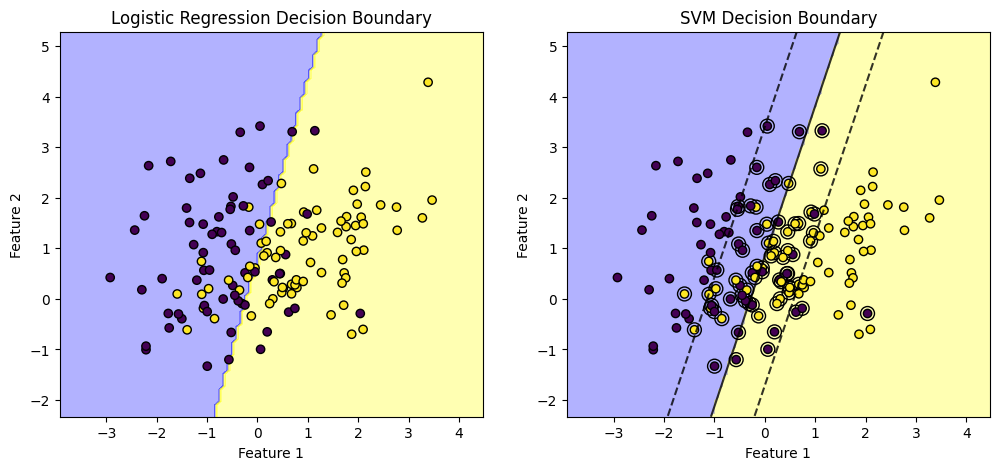

Logistic Regression Test Accuracy: 0.7833
SVM Test Accuracy: 0.8000


In [185]:
# Generate dataset with two features
X, y = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42,
                           class_sep=0.8 # Lower value for more overlap
                           )

# Split data for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Function to plot decision boundaries
def plot_models(models, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    custom_cmap = ListedColormap(['blue', 'yellow'])

    plt.figure(figsize=(12, 5))

    for i, (model, title) in enumerate(models):
        plt.subplot(1, 2, i + 1)

        # Use a special plot for SVM
        if isinstance(model, SVC):
            # Use decision_function to get margins
            Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            # Plot the background regions
            plt.contourf(xx, yy, Z > 0, cmap=custom_cmap, alpha=0.3)
            # Plot the hyperplane and margins
            plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.8, linestyles=['--', '-', '--'])
            # Highlight support vectors
            plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
                        linewidth=1, facecolors='none', edgecolors='k')
        else: # For all other models (like Logistic Regression)
            Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contourf(xx, yy, Z, cmap=custom_cmap, alpha=0.3)

        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title(title)

    plt.show()

# Plot decision boundaries for both models using the TRAINING data
plot_models([(log_reg, "Logistic Regression Decision Boundary"), (svm_model, "SVM Decision Boundary")], X_train, y_train)

# Print the accuracy on the TEST set
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Logistic Regression Test Accuracy: {log_reg_acc:.4f}")
print(f"SVM Test Accuracy: {svm_acc:.4f}")

1. Visual comparision
  - **Logistic Regression plot**
    - Logistic Regression plots a single straight line separating the two colored regions (blue and yellow).
    -  This line is positioned to best model the probability of a point belonging to a class.
    - It is influenced by all the data points.
    - Line tries to find a "center of mass" balance between the two entire clouds of points.
    - Even the points far away from the boundary have a small say in where the line goes.
  - **SVM plot**
    - It plots a straight line (the solid black line in the middle), but it will be accompanied by two dashed lines representing the margin.
    - The SVM's line is not influenced by all the points.
    - It is positioned with a single goal: to make the "street" between the two classes as wide as possible.
    - The only points that matter are the ones with black circles around them—the support vectors.
    - These are the points on or inside the dashed margin lines.
    - If we were to move a non-circled point, the SVM boundary would not change at all.
2. Classifications
  - **Logistic Regression classification**
    - Every single blue and yellow dot influences the final position of the line. The model tries to minimize the error for all points.
    - It can be slightly more sensitive to outliers that are far from the boundary.
  - **SVM classification**
    - Only the critical points near the boundary (the circled support vectors) influence the final position of the line. Points far away are completely ignored.
    - The SVM line is robust to outliers, as long as they are far from the margin. It only cares about the difficult-to-classify points near the boundary.
3. Accuracy Scores
  - **Logistic Regression accuracy**: 78.33%
  - **SVM accuracy**: 80%
    - If the data had a non-linear boundary, an RBF-kernel SVM would vastly outperform Logistic Regression.
    - SVMs often have a slight edge when the number of features is very large.

## Q2. Logistic Regression models the probability of a class using a sigmoid function. How does this affect its decision boundary compared to SVM?

**Logistic regression**
- Every point exerts a "probabilistic pull" on the model, the decision boundary (the line where probability = 0.5) is a global consensus.
- It shifts and rotates to find a position that best satisfies the probabilities for all the data points combined.
- Even a point far away from the boundary contributes to the loss and therefore has a small influence on the final position of the line.

**SVM regression**
- Points correctly classified outside the margin have zero loss, they have zero influence on the final position of the boundary.
- The model only cares about the "difficult" points—the support vectors.
- The decision boundary is therefore a local decision, defined only by these critical points, with the goal of maximizing the margin around them.



## Q3. Modify the SVM model to use different kernel functions (RBF, Polynomial). How does the boundary change compared to the linear model?

Following is code to apply different SVM kernels.


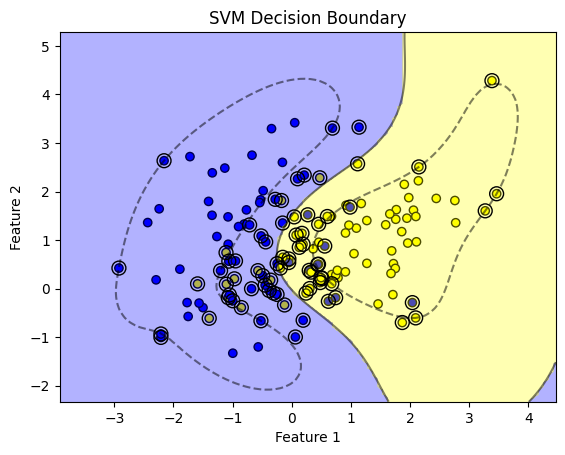

In [186]:
# Define an SVM classifier
svm_model = SVC(kernel='rbf', C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

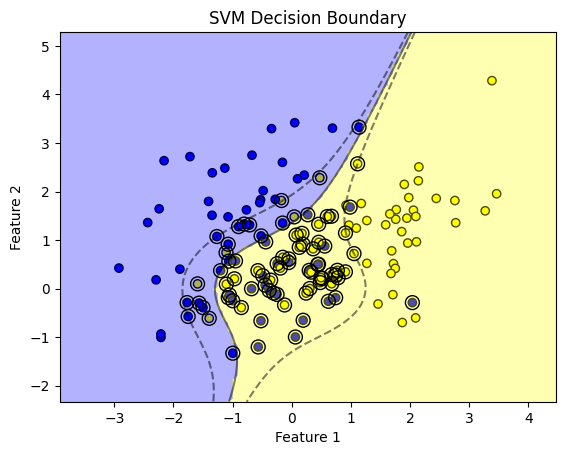

In [187]:
# Define an SVM classifier
svm_model = SVC(kernel='poly', degree=3, C=1.0)
svm_model.fit(X_train, y_train)

# Plot decision boundary for SVM
plot_decision_boundary(svm_model, X_train, y_train)

**Observations on the SVM kernel types**

- The **linear kernel** can only find the best straight line to separate the data. It's like a rigid ruler. If the data isn't separable by a straight line, it will do its best but will ultimately fail to capture the underlying pattern.
- The **rbf (Radial Basis Function) kernel** is far more flexible. It doesn't draw a straight line. Instead, it works by measuring the "similarity" or "influence" between points based on their distance.
- like RBF, the **poly kernel** creates a curved decision boundary. However, the nature of the curve is different.
  - degree=1 would be a linear equation (a straight line) $ax_1+bx_2+c=0$
  - degree=2 would be a quadratic equation (a parabola, ellipse, or hyperbola): $a{x_1}^2+b{x_2}^2+cx_1x_2+..=0$
  - degree=3 (which we used below) is a cubic equation, allowing for S-shaped curves and more complex shapes.

## Q4. If a dataset has overlapping classes, which model is more likely to generalize well? Explain.

"Overlapping classes" is another way of saying there is noise in the data—no perfect, clean boundary exists. The goal of generalization is to capture the underlying signal or trend, not to memorize the specific noise of the training data.

When a dataset has overlapping classes, a well-tuned Support Vector Machine (SVM), particularly one using an RBF kernel, is more likely to generalize well.

Overlapping data rarely has a simple linear boundary. The RBF kernel's local, distance-based nature allows it to create smooth, non-linear boundaries that can elegantly navigate the fuzzy, overlapping regions. It finds the most sensible path through the mess without being a rigid straight line.

5. Try adding random noise to the dataset `(X += np.random.normal(0, 0.5, X.shape))`. Which model is more robust to noise, and why?

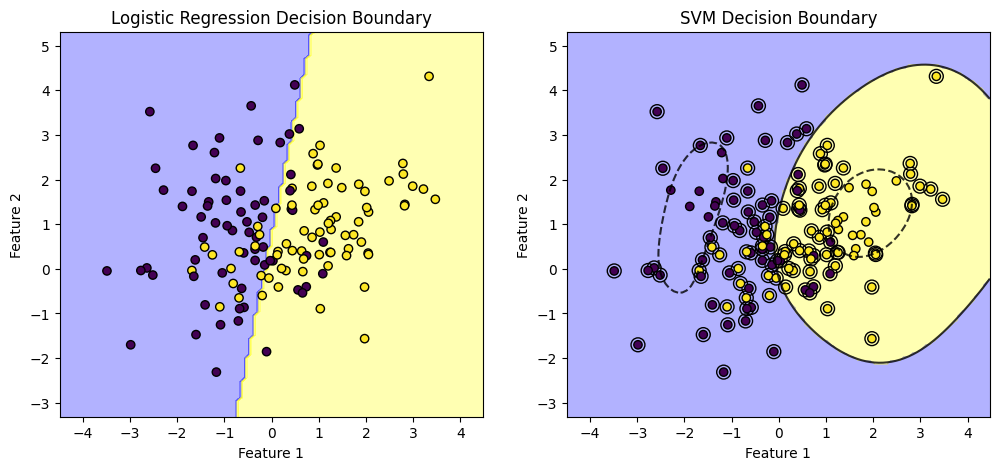

Logistic Regression Test Accuracy: 0.8000
SVM Test Accuracy: 0.8000


In [188]:
# Generate dataset with two features
X, y = make_classification(n_samples=200,
                           n_features=2,
                           n_classes=2,
                           n_clusters_per_class=1,
                           n_informative=2,
                           n_redundant=0,
                           random_state=42,
                           class_sep=0.8 # Lower value for more overlap
                           )
# We add random noise from a normal distribution to every feature of every data point.
# This makes the classes much more spread out and heavily overlapping.
X += np.random.normal(0, 0.5, X.shape)

# Split data for proper evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Train SVM model
svm_model = SVC(kernel='rbf', C=0.1)
svm_model.fit(X_train, y_train)

# Plot decision boundaries for both models using the TRAINING data
plot_models([(log_reg, "Logistic Regression Decision Boundary"), (svm_model, "SVM Decision Boundary")], X_train, y_train)

# Print the accuracy on the TEST set
log_reg_acc = accuracy_score(y_test, log_reg.predict(X_test))
svm_acc = accuracy_score(y_test, svm_model.predict(X_test))

print(f"Logistic Regression Test Accuracy: {log_reg_acc:.4f}")
print(f"SVM Test Accuracy: {svm_acc:.4f}")

The SVM is more robust to the noise. The fundamental reason for SVM's robustness lies in its Hinge Loss function.

**SVM's Hinge Loss:** Hinge Loss has a crucial property: if a data point is correctly classified and is outside the margin, its contribution to the loss is zero.

**Implication for Noise:** When we add noise, a point might move, but as long as it stays on the correct side of the "street," the model doesn't care. It has an "indifference zone." The model only focuses on the noisy points that actually cross into the margin or onto the wrong side. This makes it inherently robust to perturbations that don't affect the critical boundary region.

# Problem 3: Comparing Multiple Classification Models

A company wants to classify its customers into three segments based on their purchasing behavior:

- Class 0: Low-Value Customers
- Class 1: Mid-Value Customers
- Class 2: High-Value Customers

Using customer transaction data, we need to train multiple classification models and determine which performs best.

## Tasks#1. Apply SMOTE for class balancing.
- Let's generate the dataset where 80% of data is class 0, 19% is class 1 and 1% os class 2.
- This will lead to imbalance of data. Therefore we need to apply SMOTE to genere synthetic data to balance it.


Original dataset shape Counter({np.int64(0): 794, np.int64(1): 191, np.int64(2): 15})
Resampled dataset shape Counter({np.int64(0): 794, np.int64(1): 794, np.int64(2): 794})


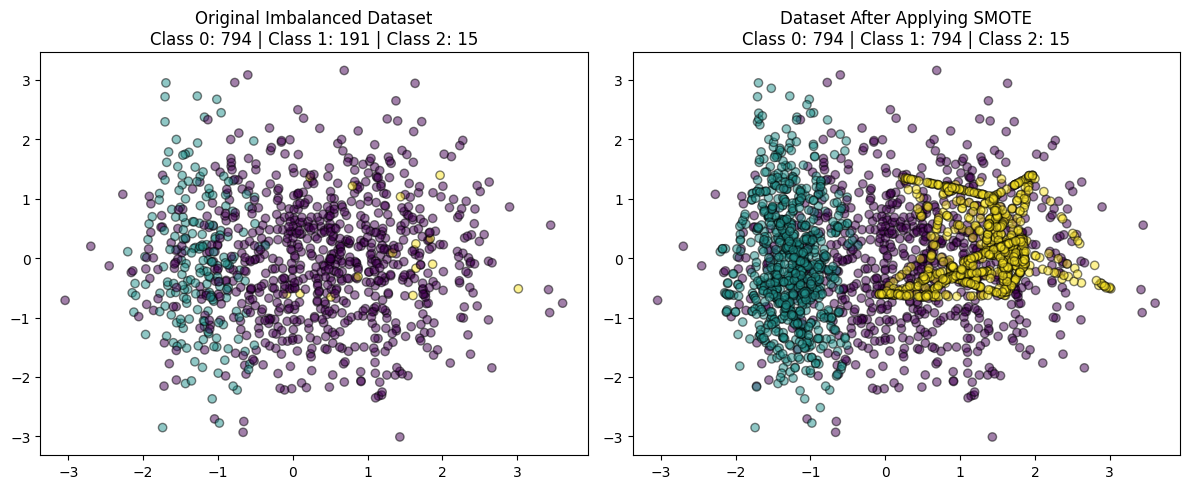

In [189]:
from collections import Counter
from imblearn.over_sampling import SMOTE

# Generate a multi-class dataset
# Let's create a dataset where 80% of data is class 0, 19% is class 1 and 1% os class 2
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42, weights=[0.80, 0.19,0.01])

def apply_smote(X, y):
  # Get the counts for the original dataset
  original_counts = Counter(y)
  print(f"Original dataset shape {original_counts}")

  # Apply SMOTE
  smote = SMOTE(random_state=42)
  X_resampled, y_resampled = smote.fit_resample(X, y)

  # Get the counts for the resampled dataset
  resampled_counts = Counter(y_resampled)
  print(f"Resampled dataset shape {resampled_counts}")


  # Plot original data
  plt.figure(figsize=(12, 5))
  plt.subplot(1, 2, 1)
  plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k')
  plt.title("Original Imbalanced Dataset")
  plt.title(f"Original Imbalanced Dataset\nClass 0: {original_counts[0]} | Class 1: {original_counts[1]} | Class 2: {original_counts[2]}")

  # Plot resampled data
  plt.subplot(1, 2, 2)
  plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, alpha=0.5, edgecolors='k')
  plt.title(f"Dataset After Applying SMOTE\nClass 0: {resampled_counts[0]} | Class 1: {resampled_counts[1]} | Class 2: {original_counts[2]}")

  plt.tight_layout()
  plt.show()
  return X_resampled, y_resampled

X_resampled, y_resampled = apply_smote(X, y)




## Tasks#2. Train Logistic Regression, Random Forest, and Support Vector Machine (SVM) on the dataset.

In [190]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

def compareMultipleClassificationModels(X, y, multi_class='multinomial'):
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

  # Create the Pipelines
  pipelines = {
      'Logistic Regression': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', LogisticRegression(random_state=42, multi_class=multi_class))
      ]),
      'Random Forest': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', RandomForestClassifier(random_state=42))
      ]),
      'Support Vector Machine': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', SVC(random_state=42))
      ])
  }

  # Train and Evaluate Each Pipeline
  for name, pipeline in pipelines.items():
      print(f"Training {name}")
      # Fit the entire pipeline on the training data
      pipeline.fit(X_train, y_train)

      print(f"\nEvaluating {name} on Test Data")
      # Make predictions on the test data
      y_pred = pipeline.predict(X_test)

      # Calculate and Print Accuracy
      accuracy = accuracy_score(y_test, y_pred)
      print(f"Accuracy: {accuracy:.4f}")

      # Calculate and Print ROC-AUC Score
      # Check if the model has a 'predict_proba' method
      if hasattr(pipeline, "predict_proba"):
          # The predict_proba returns probabilities for EACH class
          y_prob = pipeline.predict_proba(X_test)
          roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
          print(f"ROC-AUC Score (OvR, macro avg): {roc_auc:.4f}")
      else:
          # Some models like a default SVC don't have predict_proba
          print("ROC-AUC Score: Not available for this model.")

      # Print the classification report
      # This is much more informative than just accuracy
      print(classification_report(y_test, y_pred))

## Tasks# 3. Compare their performance using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

Summary on these metrics.
1. **Precision:** Of all the times the model predicted "class 1," how many were actually correct?
2. **Recall:** Of all the actual "class 1" instances, how many did the model correctly identify?
3. **F1-Score:** The harmonic mean of precision and recall, providing a single metric to balance them.
4. **Accuracy:** The percentage of total predictions the model got right.
5. **ROC-AUC Score:** A measure of a model's ability to correctly rank positive examples higher than negative examples.


Let's run it on balanced data to compare the model performance.

In [191]:
compareMultipleClassificationModels(X_resampled, y_resampled)

Training Logistic Regression

Evaluating Logistic Regression on Test Data
Accuracy: 0.8783
ROC-AUC Score (OvR, macro avg): 0.9665
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       238
           1       0.93      0.94      0.93       238
           2       0.88      0.89      0.89       239

    accuracy                           0.88       715
   macro avg       0.88      0.88      0.88       715
weighted avg       0.88      0.88      0.88       715

Training Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating Random Forest on Test Data
Accuracy: 0.9720
ROC-AUC Score (OvR, macro avg): 0.9965
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.99      0.95      0.97       238
           2       0.98      1.00      0.99       239

    accuracy                           0.97       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.97      0.97      0.97       715

Training Support Vector Machine

Evaluating Support Vector Machine on Test Data
Accuracy: 0.9622
ROC-AUC Score: Not available for this model.
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       238
           1       0.97      0.94      0.96       238
           2       0.97      1.00      0.99       239

    accuracy                           0.96       715
   macro avg       0.96      0.96      0.96       715
weighted avg       0.96      0.96      0.96       715



We can compare the model performance as below
- Let's compare `f1-score` for each model
  - Logistic regression: (0: 0.82, 1: 0.93, 0.89)
  - Random forest: (0: 0.96, 1: 0.97, 2: 0.99)
  - SVM: (0: 0.94, 1: 0.96, 2: 0.99)
- Comparing the `f1-score`, `Random Forest` modle shows better score compared to others.


## Tasks# 4. Analyze the confusion matrix to understand misclassifications.

A confusion matrix is a table that shows you how many times your model correctly predicted a class versus how many times it "confused" it with another class. Let's update the coded to generate and visualize it.

In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
import seaborn as sns

def compareMultipleClassificationModels(X, y, multi_class='multinomial'):
  # Split data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

  # Create the Pipelines
  pipelines = {
      'Logistic Regression': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', LogisticRegression(random_state=42, multi_class=multi_class))
      ]),
      'Random Forest': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', RandomForestClassifier(random_state=42))
      ]),
      'Support Vector Machine': Pipeline([
          ('scaler', StandardScaler()),
          ('classifier', SVC(random_state=42))
      ])
  }
  # Create a figure with subplots in one row. The number of columns is the number of models.
  num_models = len(pipelines)
  fig, axes = plt.subplots(1, num_models, figsize=(6 * num_models, 5))

  # Train and Evaluate Each Pipeline
  for i, (name, pipeline) in enumerate(pipelines.items()):
      print(f"Training {name}")
      # Fit the entire pipeline on the training data
      pipeline.fit(X_train, y_train)

      print(f"\nEvaluating {name} on Test Data")
      # Make predictions on the test data
      y_pred = pipeline.predict(X_test)

      # Calculate and Print Accuracy
      accuracy = accuracy_score(y_test, y_pred)
      print(f"Accuracy: {accuracy:.4f}")

      # Calculate and Print ROC-AUC Score
      # Check if the model has a 'predict_proba' method
      if hasattr(pipeline, "predict_proba"):
          # The predict_proba returns probabilities for EACH class
          y_prob = pipeline.predict_proba(X_test)
          roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='macro')
          print(f"ROC-AUC Score (OvR, macro avg): {roc_auc:.4f}")
      else:
          # Some models like a default SVC don't have predict_proba
          print("ROC-AUC Score: Not available for this model.")

      # Print the classification report
      # This is much more informative than just accuracy
      print(classification_report(y_test, y_pred))

      # Generate the confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      # Determine class labels dynamically
      class_labels = [f'Class {c}' for c in pipeline.classes_]

      # Plot the heatmap on the i-th subplot
      sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                  xticklabels=class_labels, yticklabels=class_labels, ax=axes[i])

      axes[i].set_title(f'Confusion Matrix for\n{name}')
      axes[i].set_ylabel('Actual Class')
      axes[i].set_xlabel('Predicted Class')

  plt.tight_layout()
  plt.show()

Training Logistic Regression

Evaluating Logistic Regression on Test Data
Accuracy: 0.8783
ROC-AUC Score (OvR, macro avg): 0.9665
              precision    recall  f1-score   support

           0       0.82      0.81      0.82       238
           1       0.93      0.94      0.93       238
           2       0.88      0.89      0.89       239

    accuracy                           0.88       715
   macro avg       0.88      0.88      0.88       715
weighted avg       0.88      0.88      0.88       715



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Training Random Forest

Evaluating Random Forest on Test Data
Accuracy: 0.9720
ROC-AUC Score (OvR, macro avg): 0.9965
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.99      0.95      0.97       238
           2       0.98      1.00      0.99       239

    accuracy                           0.97       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.97      0.97      0.97       715

Training Support Vector Machine

Evaluating Support Vector Machine on Test Data
Accuracy: 0.9622
ROC-AUC Score: Not available for this model.
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       238
           1       0.97      0.94      0.96       238
           2       0.97      1.00      0.99       239

    accuracy                           0.96       715
   macro avg       0.96      0.96      0.96       715
weighted avg       0.96      0.96

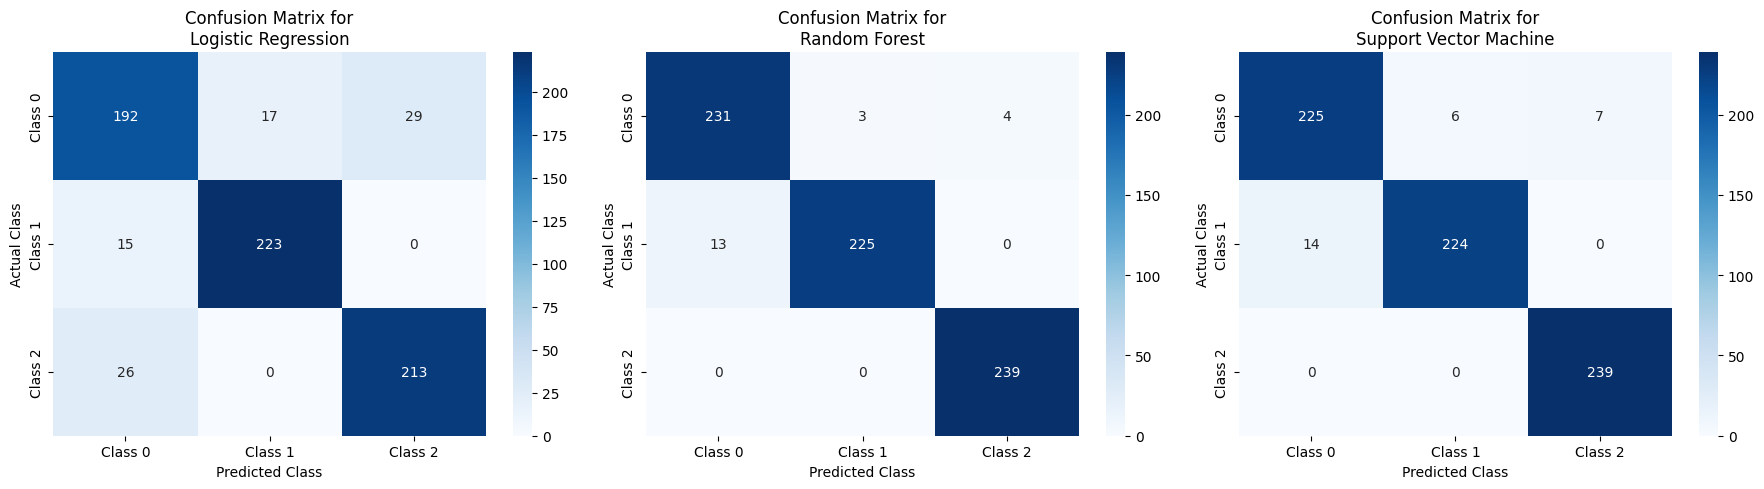

In [193]:
# Run it on balanced dataset
compareMultipleClassificationModels(X_resampled, y_resampled)

## Task# 5. Discuss the impact of using SMOTE for class balancing and whether it improves performance.

So far we ran the models on the balanaced dataset. To compare the impact of SMOTE, let's run the models on the embalanced dataset as well.



Training Logistic Regression

Evaluating Logistic Regression on Test Data
Accuracy: 0.9433
ROC-AUC Score (OvR, macro avg): 0.9261
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       238
           1       0.98      0.77      0.86        57
           2       1.00      0.20      0.33         5

    accuracy                           0.94       300
   macro avg       0.97      0.66      0.72       300
weighted avg       0.95      0.94      0.94       300

Training Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating Random Forest on Test Data
Accuracy: 0.9567
ROC-AUC Score (OvR, macro avg): 0.9649
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       238
           1       1.00      0.86      0.92        57
           2       0.00      0.00      0.00         5

    accuracy                           0.96       300
   macro avg       0.65      0.62      0.63       300
weighted avg       0.94      0.96      0.95       300

Training Support Vector Machine

Evaluating Support Vector Machine on Test Data
Accuracy: 0.9433
ROC-AUC Score: Not available for this model.
              precision    recall  f1-score   support

           0       0.93      1.00      0.97       238
           1       1.00      0.79      0.88        57
           2       0.00      0.00      0.00         5

    accuracy                           0.94       300
   macro avg       0.64      0.60      0.62       300
weighted avg       0.93      0.94      0.93       300



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

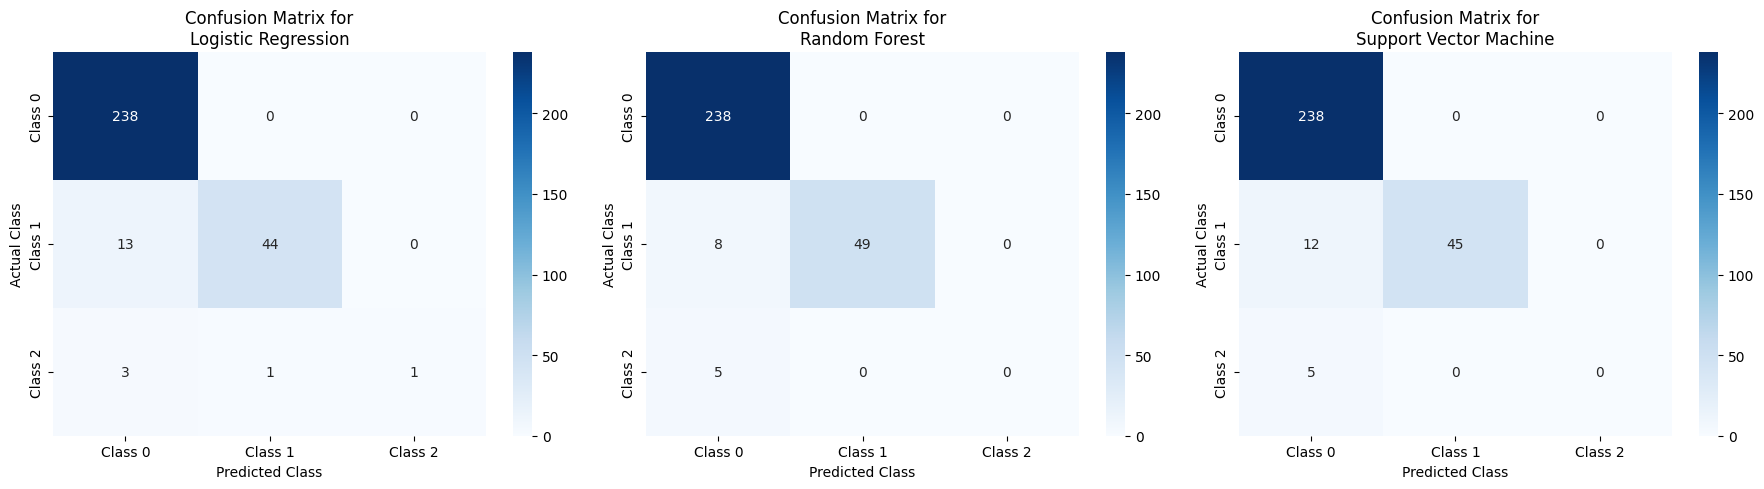

In [194]:
# Run it on embalanced dataset
compareMultipleClassificationModels(X, y)

### Observation on SMOTE vs original embalanced
- `f1-score` shows very poor score for class#1 and class#2 on original embalanced dataaset compared with SMOTE
- Confusion matrix also shows the poor performance for class#1 and class#2

## Q1. Which model performs best overall? Compare using F1-score and ROC-AUC.
Ans. As we observed before `Random Forest` performs best overall.

## Q2. How does SMOTE affect classification performance? Would balancing the dataset improve certain metrics?
- As we observed earlier, SMOTE grately improved the classification performance based on both `f1-score` and confusion matrix.
- Yes, balancing dataset definately improved all the matrix for class#2 and class#3.



## Q3. If this were a business decision-making tool, should we prioritize Precision or Recall? Why?

The choice to prioritize **Precision** or **Recall** completely depends on the cost of the two different types of errors our model can make.

Let's define these errors in simple business terms:
- **False Positive (The "Crying Wolf" Error):** Our model predicts "Yes," but the actual answer is "No." (e.g., flagging a legitimate transaction as fraudulent).
- **False Negative (The "Missed Detection" Error):** Our model predicts "No," but the actual answer is "Yes." (e.g., letting a fraudulent transaction go through).

**Scenario 1: Prioritize PRECISION (The "Be Careful" Model)**
- We prioritize **Precision** when the cost of a False Positive is very high.
- We want to be very sure that when your model predicts "Yes," it is correct.

**Scenario 2: Prioritize RECALL (The "Don't Miss Anything" Model)**
- We prioritize **Recall** when the cost of a False Negative is very high.
- We want to find as many of the true positive cases as possible, even if it means you get some false alarms.

**What if both are important?**
- This is often the case. This is where the **F1-Score** comes in.
- The **F1-score** is the harmonic mean of Precision and Recall.
- It provides a single metric that balances both concerns.
- If we want a model that has both decent Precision and decent Recall, we would aim to maximize the F1-score.

## Q4. Try switching the multi-class classification setting in Logistic Regression. How does the performance change? (Hint: `ovr`)

To improve binary classifier like Logistic Regression adapts to a multi-class problem, Scikit-learn's LogisticRegression offers two primary strategies for this, controlled by the multi_class parameter:
- **ovr (One-vs-Rest):**
  - This is the "divide and conquer" approach.
  - This strategy fits one separate binary classifier for each class.
- **multinomial (Softmax Regression):**
  - This is the "all-at-once" approach.
  - This strategy fits a single, unified model that handles all classes at once.
  - Instead of using the sigmoid function (for binary problems), it uses the softmax function.

The default value for the multi_class parameter is 'auto'. The 'auto' setting doesn't just pick one strategy; it intelligently selects the best one based on dataset.  Let's inspect the following code we used.
```
LogisticRegression(random_state=42)
```
- In the above code, we did not specify a `solver`.
- The default `solver` for `LogisticRegression` is 'lbfgs'.
- Therefore, because the `solver` was `lbfgs`r, the `multi_class='auto'` setting resolved to `'multinomial' (Softmax Regression)`.

Let's change code to use `ovr` to see the performance differnence for LogisticRegression.

Training Logistic Regression

Evaluating Logistic Regression on Test Data
Accuracy: 0.8741
ROC-AUC Score (OvR, macro avg): 0.9677
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       238
           1       0.99      0.91      0.95       238
           2       0.85      0.89      0.87       239

    accuracy                           0.87       715
   macro avg       0.88      0.87      0.88       715
weighted avg       0.88      0.87      0.88       715

Training Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating Random Forest on Test Data
Accuracy: 0.9720
ROC-AUC Score (OvR, macro avg): 0.9965
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.99      0.95      0.97       238
           2       0.98      1.00      0.99       239

    accuracy                           0.97       715
   macro avg       0.97      0.97      0.97       715
weighted avg       0.97      0.97      0.97       715

Training Support Vector Machine

Evaluating Support Vector Machine on Test Data
Accuracy: 0.9622
ROC-AUC Score: Not available for this model.
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       238
           1       0.97      0.94      0.96       238
           2       0.97      1.00      0.99       239

    accuracy                           0.96       715
   macro avg       0.96      0.96      0.96       715
weighted avg       0.96      0.96      0.96       715



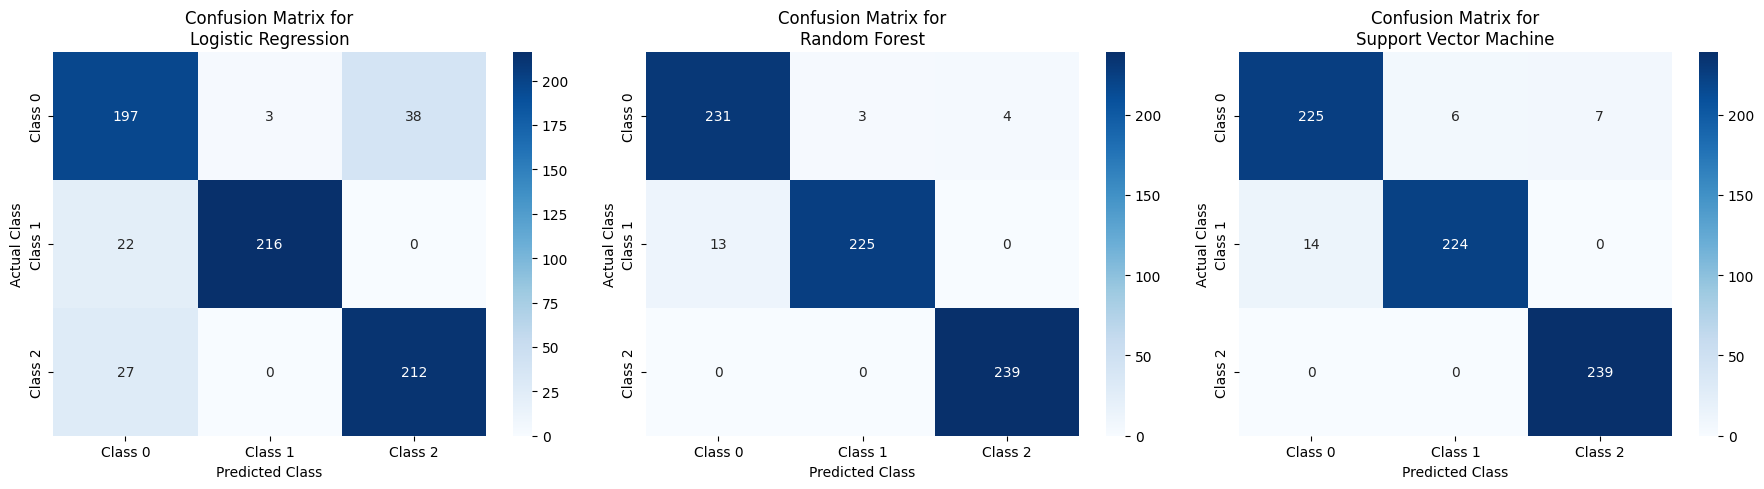

In [195]:
# Run it on balanced dataset
compareMultipleClassificationModels(X_resampled, y_resampled, multi_class='ovr')

Let's compare `f1-score` for LogisticRegression **ovr** vs **multinomial**
  - `multinomial`: (0: 0.82, 1: 0.93, 2: 0.89)
  - `ovr`: (0: 0.81, 1: 0.95, 2: 0.87)

There is no significant difference but based on our metrics, we can still say that`ovr` is performing poor compared to `multinomial`


## Q5. Modify the dataset to have more overlapping classes. Which model handles this situation better?

Following code was used to generate the dataset
```
X, y = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42, weights=[0.80, 0.19,0.01])

```

The key parameter in `make_classification` for controlling the separation between classes is `class_sep` (short for "class separation").
- A higher value (e.g., class_sep=2.0) pushes the clusters for each class further apart, making them easy to separate.
- A lower value (e.g., class_sep=0.5) brings the clusters closer together, causing them to "mix" or overlap significantly.
- The default value is `1.0`. To create more overlap, we simply need to set this to a smaller number.

Let's quickly plot earlier dataset to compare before and after overlapping.

Original dataset shape Counter({np.int64(0): 794, np.int64(1): 191, np.int64(2): 15})
Resampled dataset shape Counter({np.int64(0): 794, np.int64(1): 794, np.int64(2): 794})


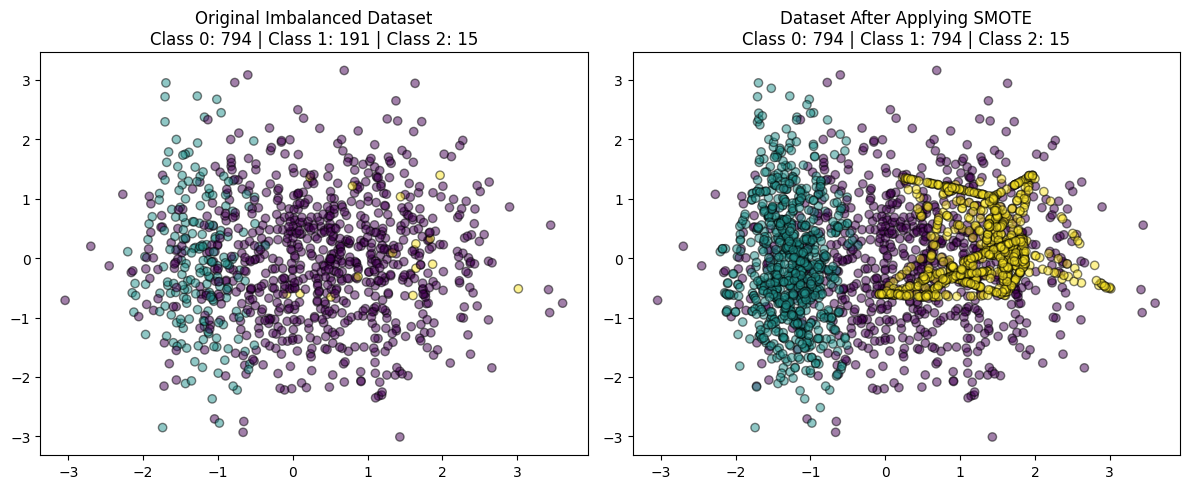

In [196]:
X_resampled, y_resampled = apply_smote(X, y)

Let's generate data with more overalp

In [197]:
X_overlapped, y_overlapped = make_classification(n_samples=1000, n_features=10, n_classes=3, n_clusters_per_class=1, random_state=42, weights=[0.80, 0.19,0.01], class_sep=0.5)

Original dataset shape Counter({np.int64(0): 794, np.int64(1): 191, np.int64(2): 15})
Resampled dataset shape Counter({np.int64(0): 794, np.int64(1): 794, np.int64(2): 794})


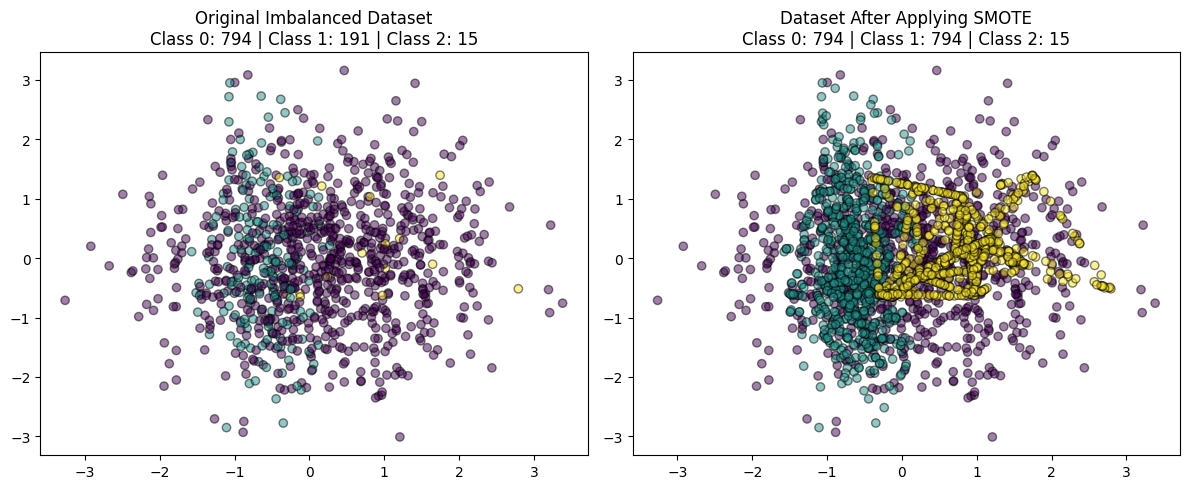

In [198]:
X_overlapped_resampled, y_overlapped_resampled = apply_smote(X_overlapped, y_overlapped)

As we wee, now dataset has more overlap compared to before. Let's apply models to compare the performance.

Training Logistic Regression

Evaluating Logistic Regression on Test Data
Accuracy: 0.6839
ROC-AUC Score (OvR, macro avg): 0.8301
              precision    recall  f1-score   support

           0       0.59      0.50      0.54       238
           1       0.75      0.75      0.75       238
           2       0.70      0.81      0.75       239

    accuracy                           0.68       715
   macro avg       0.68      0.68      0.68       715
weighted avg       0.68      0.68      0.68       715

Training Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Evaluating Random Forest on Test Data
Accuracy: 0.9510
ROC-AUC Score (OvR, macro avg): 0.9959
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       238
           1       0.97      0.94      0.95       238
           2       0.96      0.99      0.97       239

    accuracy                           0.95       715
   macro avg       0.95      0.95      0.95       715
weighted avg       0.95      0.95      0.95       715

Training Support Vector Machine

Evaluating Support Vector Machine on Test Data
Accuracy: 0.9217
ROC-AUC Score: Not available for this model.
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       238
           1       0.93      0.92      0.93       238
           2       0.91      1.00      0.95       239

    accuracy                           0.92       715
   macro avg       0.92      0.92      0.92       715
weighted avg       0.92      0.92      0.92       715



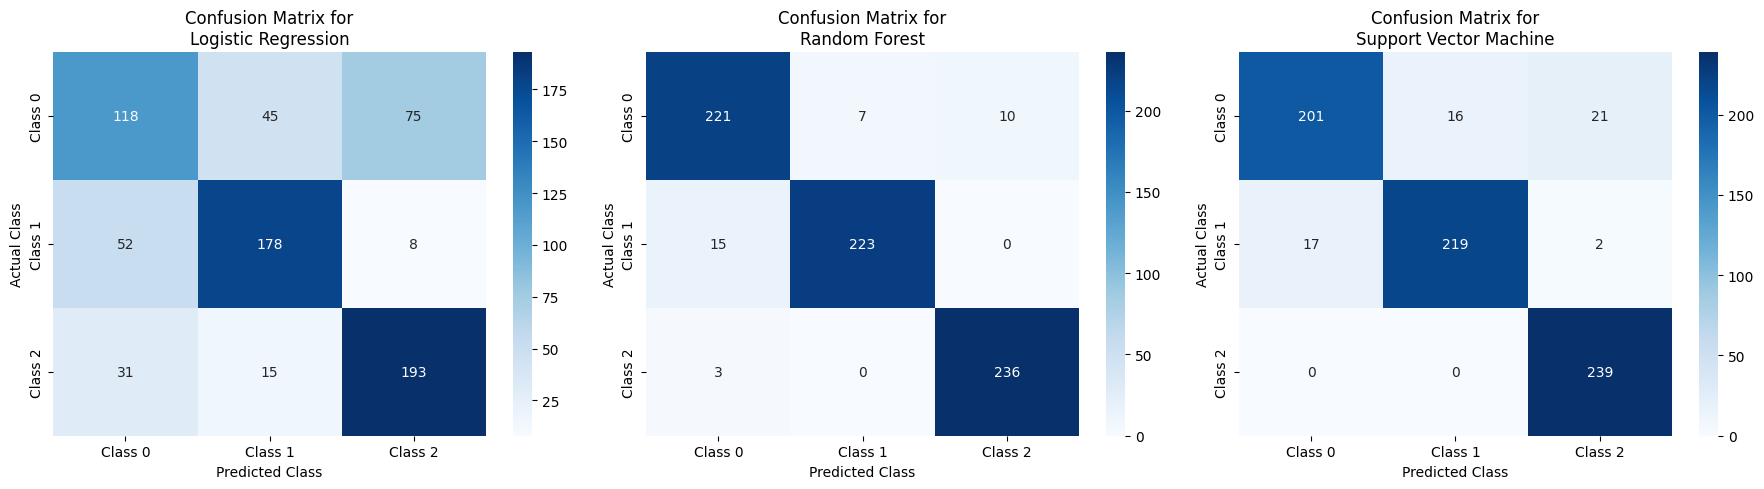

In [199]:
# Run it on balanced dataset
compareMultipleClassificationModels(X_overlapped_resampled, y_overlapped_resampled)

Based on above metrics, we can say that `Random Forest` performs better.